# Practice Encoding a Deep Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [3]:
# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Looking at the top of our DataFrame, there are multiple columns with categorical values as well as our numerical values. To make things easier, we should generate a list of categorical variable names. Instead of searching across all 35 columns and keeping track of which variables need categorical preprocessing, we'll let Python do all of the heavy lifting. As an added bonus, we can use our variable list to perform the one-hot encoding once, rather than for each individual variable. To generate our variable list, we'll use Pandas Dataframe.dtypes property. Add and run the following code in your noteboo

In [4]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [ ]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

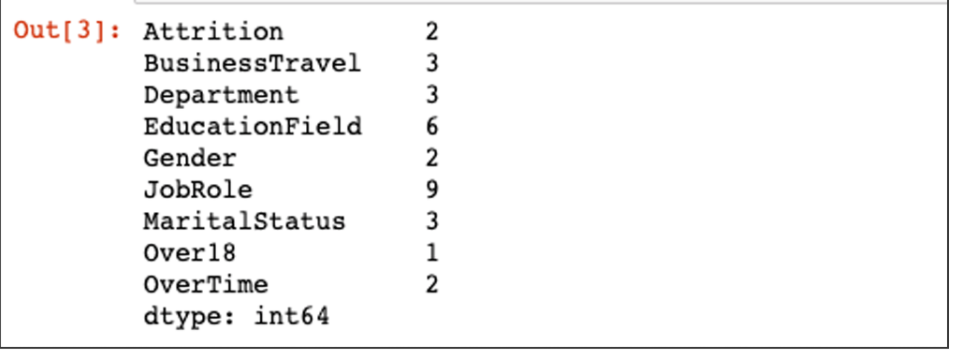

## OneHotEncoder
Now that we have our variable names separated, we can start to preprocess our data starting with the one-hot encoding of the categorical data. Looking at our attrition_cat variable, there are eight categorical variables that need encoding. However, before we loop through our variables and encode them using Scikit-learn's OneHotEncoder module, we need to make sure that none of the categorical variables have more than 10 unique values and require bucketing. To check the three variables, add and run the following code:

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

In [8]:
# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()


Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  \
0           0.0            1.0                        0.0   
1           1.0            0.0                        0.0   
2           0.0            1.0                        0.0   
3           1.0            0.0                        0.0   
4           1.0            0.0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                             0.0   
3               0.0                             0.0   
4               0.0                             0.0   

   EducationField_Life Sciences  ...  JobRole_Research Director  \
0                           1.0  ...                        0.0   
1                           1.0  ...                        0.0   
2                           0.0  ...                        0.0   
3                           1.0  ...                        0.0   
4                           0.0  ...                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  \
0                    0.0                   1.0       1.0          0.0   
1                    1.0                   0.0       1.0          1.0   
2                    0.0                   1.0       1.0          0.0   
3                    1.0                   0.0       1.0          0.0   
4                    1.0                   0.0       1.0          1.0   

   OverTime_Yes  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           0.0  

[5 rows x 31 columns]

Now that our categorical variables have been encoded, they are ready to replace our unencoded categorical variables in our dataset.

To replace these columns, we'll use a combination of Pandas' merge and drop methods. Add and run the following code in the notebook:

In [9]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                        0.0                         0.0   
1                        0.0                         1.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         0.0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                      1.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                     0.0                    0.0                   1.0   
1                     0.0                    1.0                   0.0   
2                     0.0                    0.0                   1.0   
3                     0.0                    1.0                   0.0   
4                     0.0                    1.0                   0.0   

   Over18_Y  OverTime_No  OverTime_Yes  
0       1.0          0.0           1.0  
1       1.0          1.0           0.0  
2       1.0          0.0           1.0  
3       1.0          0.0           1.0  
4       1.0          1.0           0.0  

[5 rows x 57 columns]

Next we must split our training and testing data, then standardize our numerical variables using Scikit-learn's StandardScaler module.

To build our training and testing datasets, we need to separate two values:

input values (which are our independent variables commonly referred to as model features or "X" in TensorFlow documentation (Links to an external site.))
target output (our dependent variable commonly referred to as target or "y" in TensorFlow documentation)
For our purposes, we want to build a model that will predict whether or not a person is at risk for attrition; therefore, we must separate the "Attrition" columns from the rest of the input data. In fact, because the attrition data is dichotomous (one of two values), we only need to keep the "Attrition_Yes" column—we can ignore the "Attrition_No" column because it is redundant. 

In [10]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

In [86]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that our training and testing data have been allocated, we're ready to build our StandardScalerobject and standardize the numerical features. Add and run the following code to the notebook:

In [87]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [88]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [89]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Now that our data is preprocessed via one-hot encoding and standardization, we should probably perform a gut check to ensure that no data has been lost from our original DataFrame.

## Create the Deep Learning Model
At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:

For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.

In our hidden layers, our deep learning model structure will be slightly different—we'll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we'll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.

In the output layer, we'll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.

In [90]:
# Define the model - deep neural net
# add the number of input features equal to the numberr of variables ni our feature DataFrame
number_input_features = len(X_train[0]) 
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 448       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


Looking at our model summary, we can see that the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for each neuron. Our first layer has 55 input values, and multiplied by the eight neurons (plus eight bias terms for each neuron) gives us a total of 448 weight parameters—plenty of opportunities for our model to find trends in the dataset.

## Checkpoint Dependencies
With TensorFlow, we have the ability to save and load neural network models at any stage, including partially trained models. When building a TensorFlow model, if we use Keras' ModelCheckpoint method, we can save the model weights after it tests a set number of data points. Then, at any point, we can reload the checkpoint weights and resume model training. Saving checkpoints while training has a number of benefits:

We can short-circuit our training loop at any time (stop the function by pressing CTRL+C, or by pressing the stop button at the top of the notebook). This can be helpful if the model is showing signs of overfitting.

The model is protected from computer problems (power failure, computer crash, etc.). Worst-case scenario: We would lose five epochs' worth of optimization.

We can restore previous model weight coefficients to try and revert overfitting.

In [91]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [92]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a callback object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

filepath=checkpoint_path—the checkpoint directory and file structure we defined previously

verbose=1—we'll be notified when a checkpoint is being saved to the directory

save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space

save_freq=1000—checkpoints will be saved every thousand samples tested (across all epochs)

Bringing it all together, we can compile, train, and evaluate our deep learning model by adding and running the following code:

In [93]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

In [96]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3723 - accuracy: 0.8804
Loss: 0.3723490238189697, Accuracy: 0.8804348111152649


Looking at our deep learning model's performance metrics, the model was able to correctly identify employees who are at risk of attrition approximately 87% of the time. Considering that our input data included more than 30 different variables with more than 1,400 data points, the deep learning model was able to produce a fairly reliable classifier.

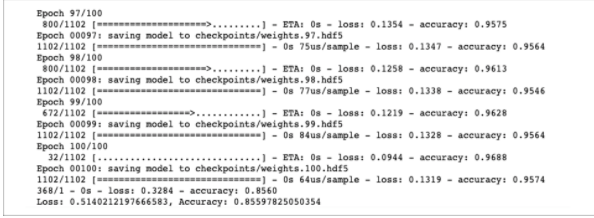

After running the previous code, we have created our trained model within the Python session, as well as a folder of checkpoints we can use to restore previous model weights. Now if we ever need to restore weights, we can use the Keras Sequential model's load_weights method to restore the model weights. To test this functionality, let's define another deep learning model, but restore the weights using the checkpoints rather than training the model. Once again we must add and run the following to our notebooks:

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Using the checkpoints, we were able to regenerate the model instantaneously and confirm the model was able to produce the exact same results.

## Save After Training

In [99]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

After running the code, we should see a file named "trained_attrition.h5," which contains the complete model and configuration. Now that we have the model saved, we can create the model at any point. Let's try importing the model into the notebook without providing any structure or context. To import the model, add and run the following code:

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

Lastly, we can test the performance of the model on our test dataset by adding and running the following code:

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

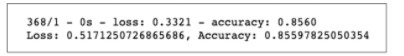

Looking at the final results, our imported model was able to reproduce the exact same performance metrics as the original model. Using this same procedure, we can import any type of Keras model for evaluation on a dataset with the same features.